<a href="https://colab.research.google.com/github/saurabhsingh1411/cnn_fashion_mnist_multiclassifier/blob/master/Fashion_mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing lib and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv('fashion-mnist_train.csv')
data_test=pd.read_csv('fashion-mnist_test.csv')

## Visulizing data and prepocossing

In [3]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [4]:
print(data_train.shape)
print(data_test.shape)

(60000, 785)
(10000, 785)


In [5]:
from keras.utils import to_categorical
training_images=np.array(data_train.iloc[:,1:])
training_labels=to_categorical(np.array(data_train.iloc[:,0]))

In [6]:
print(training_images.shape)
print(training_labels.shape)

(60000, 784)
(60000, 10)


In [7]:
from keras.utils import to_categorical
testing_images=np.array(data_test.iloc[:,1:])
testing_labels=to_categorical(np.array(data_test.iloc[:,0]))

In [8]:
print(testing_images.shape)
print(testing_labels.shape)

(10000, 784)
(10000, 10)


In [9]:
test_images= np.array(data_test.iloc[:, 1:])
test_labels= to_categorical(np.array(data_test.iloc[:, 0]))

In [10]:
print(test_images.shape)
print(test_labels.shape)

(10000, 784)
(10000, 10)


## Preprocessing the model

In [11]:
from sklearn.model_selection import train_test_split
img_rows,img_cols=28,28
X=np.array(data_train.iloc[:,1:])
y=to_categorical(np.array(data_train.iloc[:,0]))

In [12]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=13)

In [13]:
X_test = np.array(data_test.iloc[:, 1:])
y_test=to_categorical(np.array(data_test.iloc[:,0]))

In [14]:

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [16]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')

In [17]:
X_train=X_train/255
X_test=X_test/255
X_val=X_val/255

## Model buidling

In [18]:
import tensorflow as tf


In [19]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(10,activation='softmax')
])

In [20]:
from tensorflow import keras
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy']
              )

In [21]:
epochs=5
history=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val,y_val))

#score=model.evaluate(X_test,y_test,verbos=0)

Epoch 1/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.4706 - accuracy: 0.8287 - val_loss: 0.3679 - val_accuracy: 0.8673
Epoch 2/5
1500/1500 [==============================] - 68s 46ms/step - loss: 0.3145 - accuracy: 0.8850 - val_loss: 0.3159 - val_accuracy: 0.8892
Epoch 3/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2694 - accuracy: 0.9002 - val_loss: 0.2792 - val_accuracy: 0.9000
Epoch 4/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2313 - accuracy: 0.9144 - val_loss: 0.2691 - val_accuracy: 0.9033
Epoch 5/5
1500/1500 [==============================] - 68s 46ms/step - loss: 0.2033 - accuracy: 0.9244 - val_loss: 0.2546 - val_accuracy: 0.9068


TypeError: ignored

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)

In [23]:
predicted_classes=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('test loss and test accuract', score[0] ,score[1])

test loss and test accuract 0.24210508167743683 0.9133999943733215


In [25]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
epochs=range(len(acc))

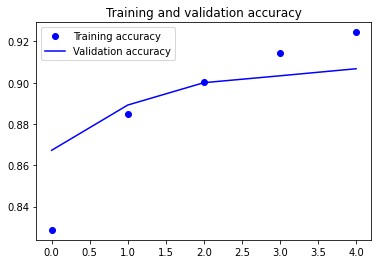

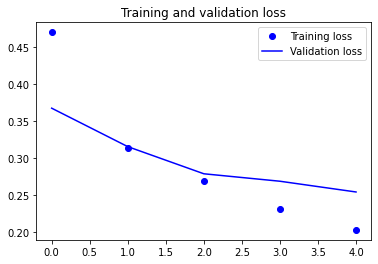

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()